In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ตั้งค่าให้กราฟคมชัดขึ้น
%matplotlib inline
plt.rcParams["figure.dpi"] = 150

In [18]:
log_folder = Path(".")  # หรือเปลี่ยนเป็น Path("tana") ถ้าไฟล์อยู่ในโฟลเดอร์ย่อย
csv_files = list(log_folder.glob("log*.csv"))

# แสดงชื่อไฟล์ที่พบ
for file in csv_files:
    print("📄", file.name)

📄 logPI_slide_square.csv
📄 log_slide_square_P.csv
📄 log_slide_square_PD.csv
📄 log_slide_square_PID.csv
📄 log_square_simple.csv


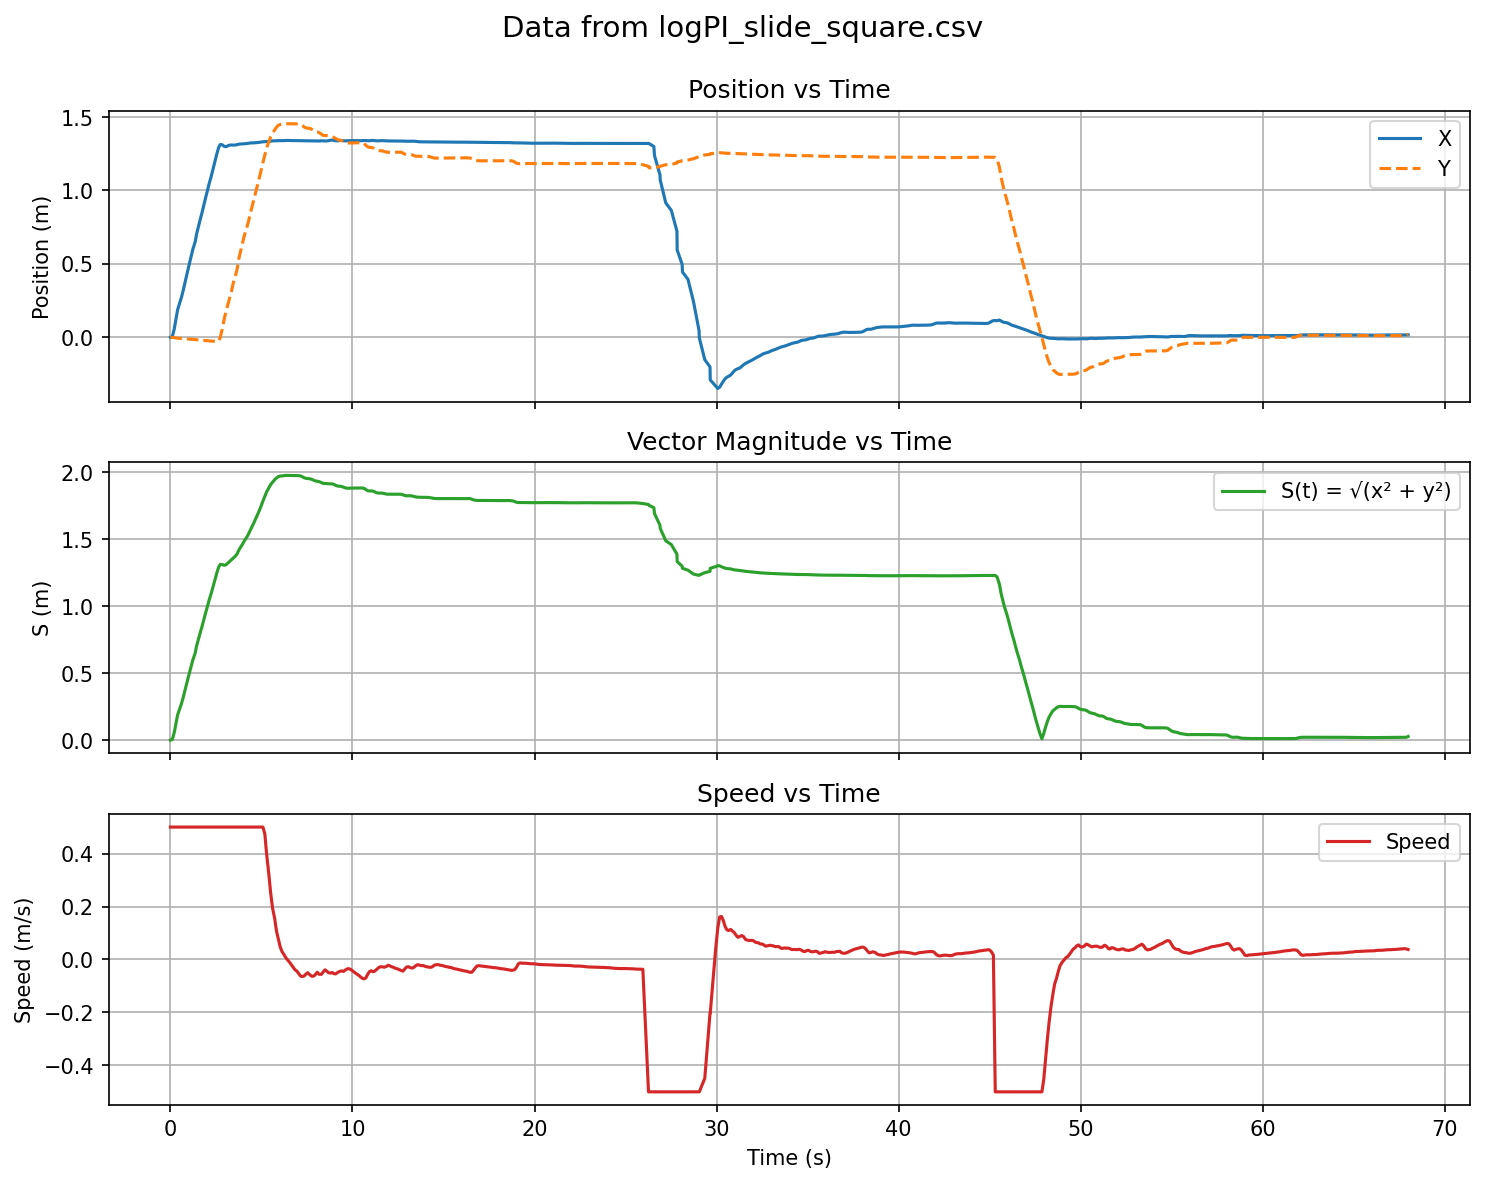

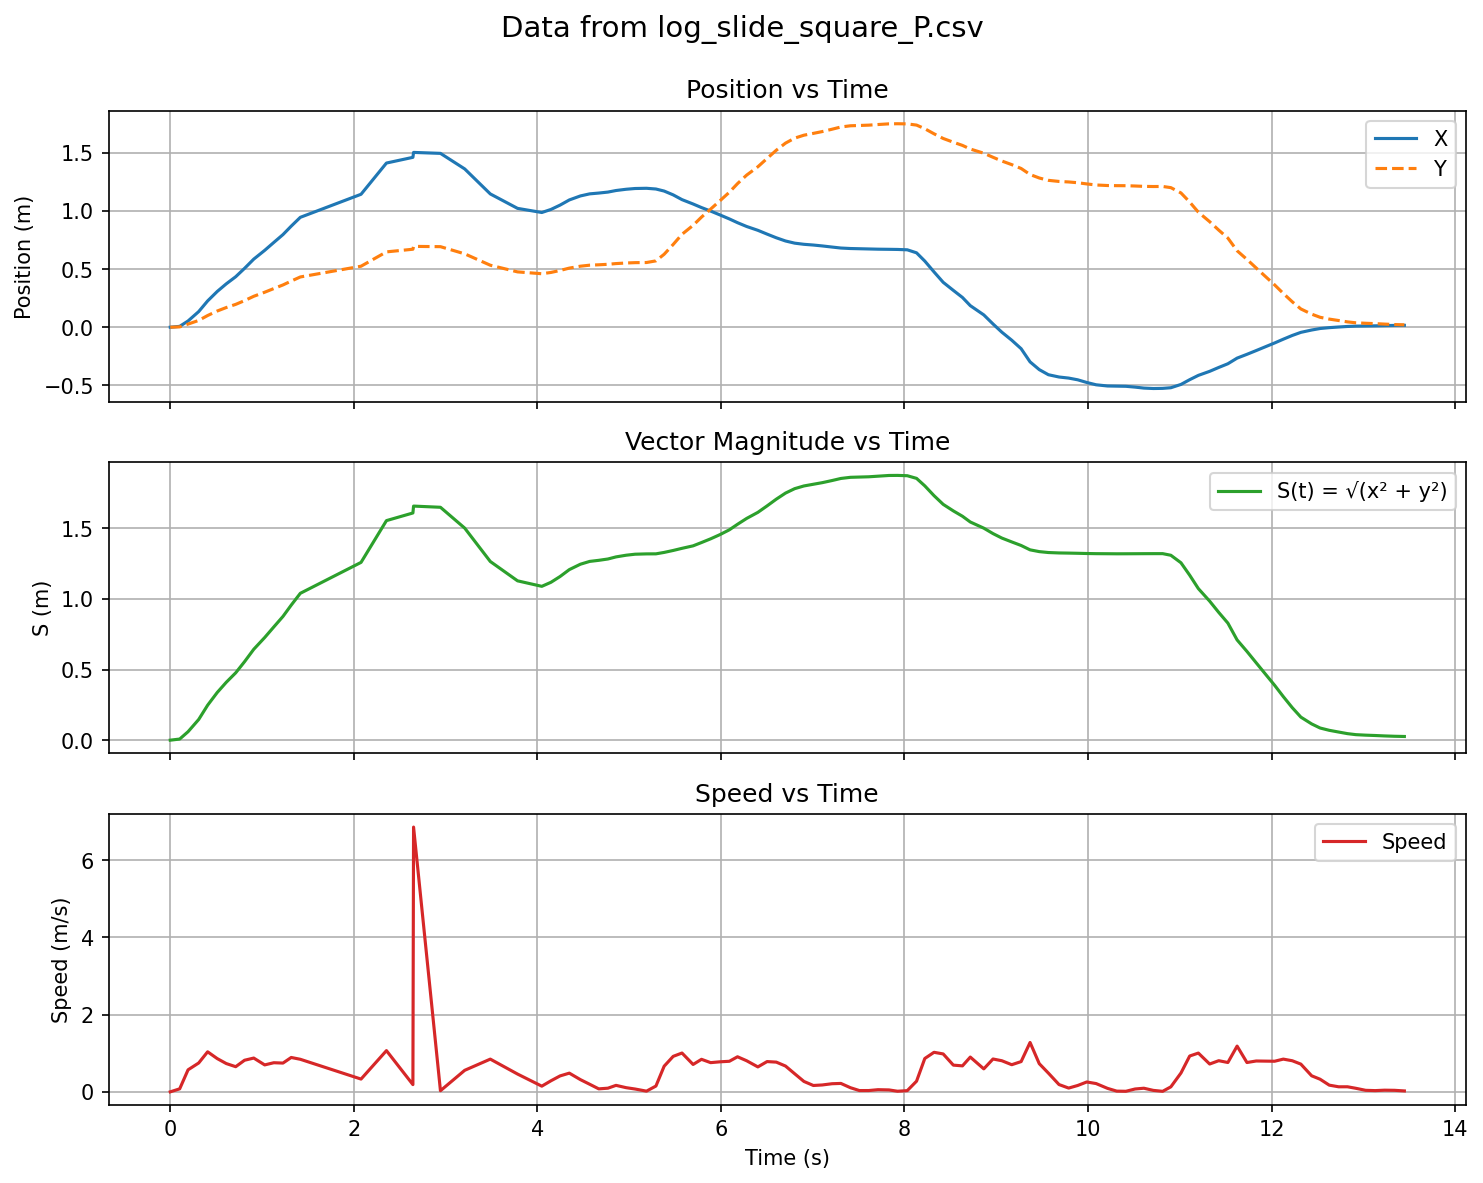

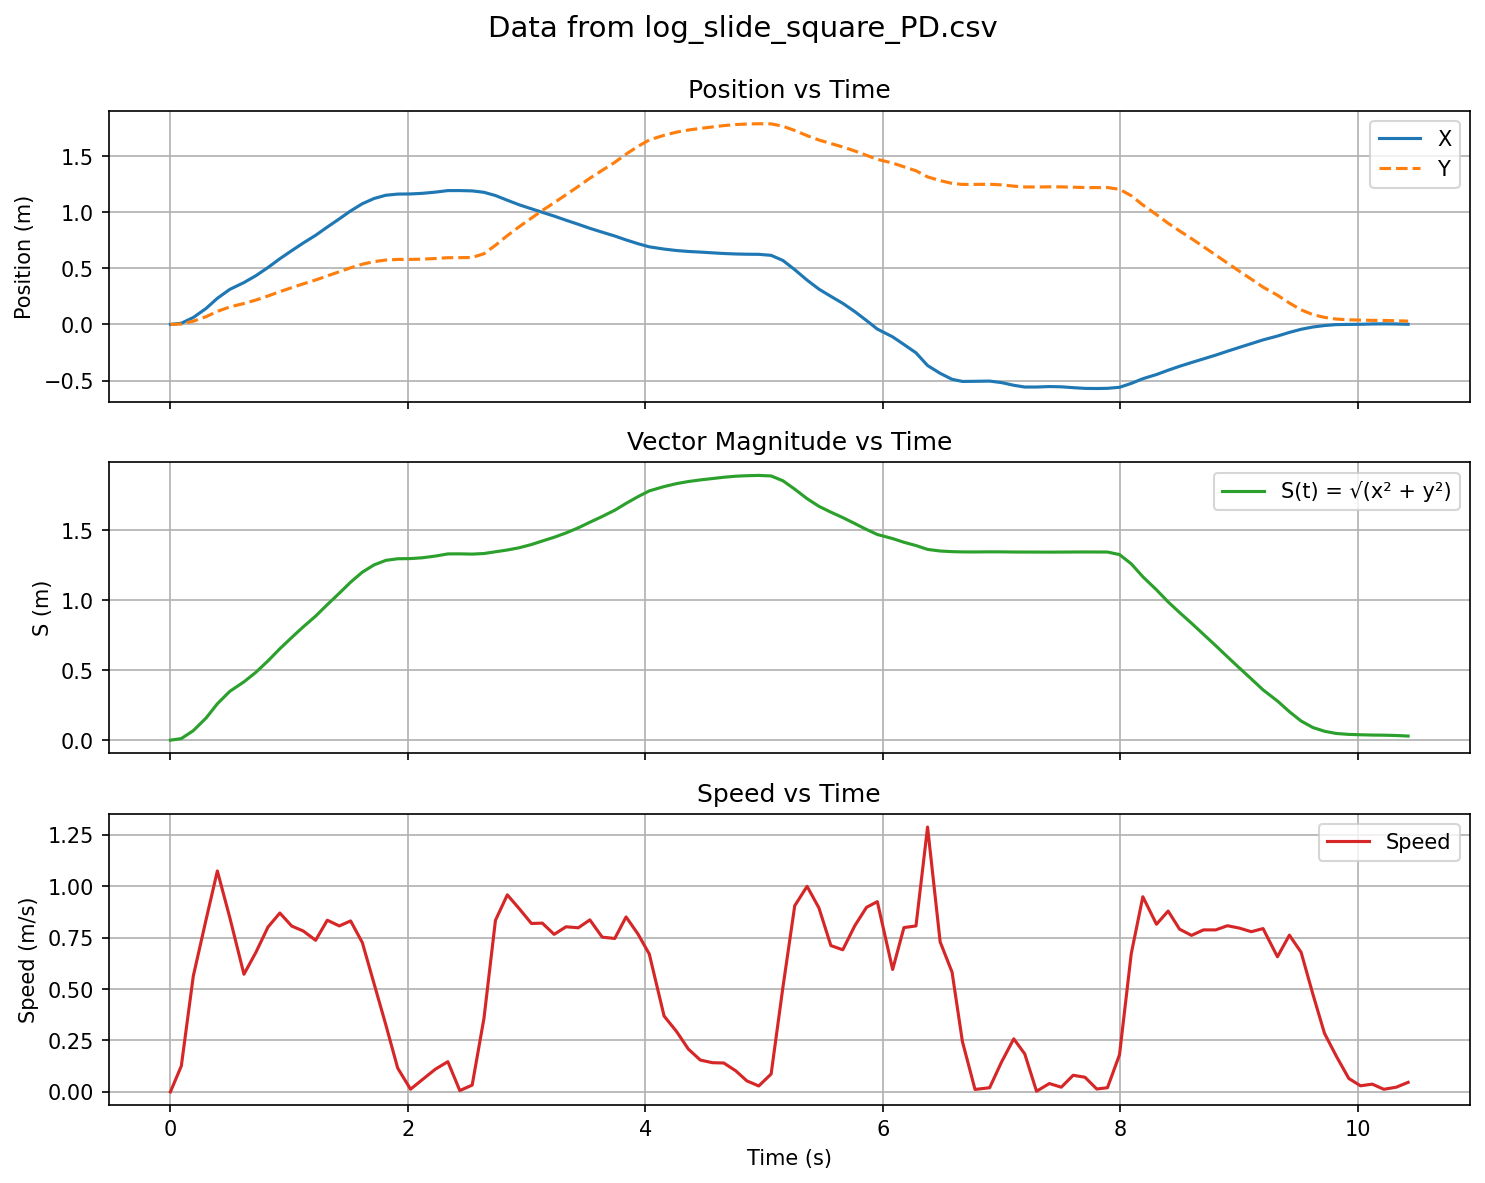

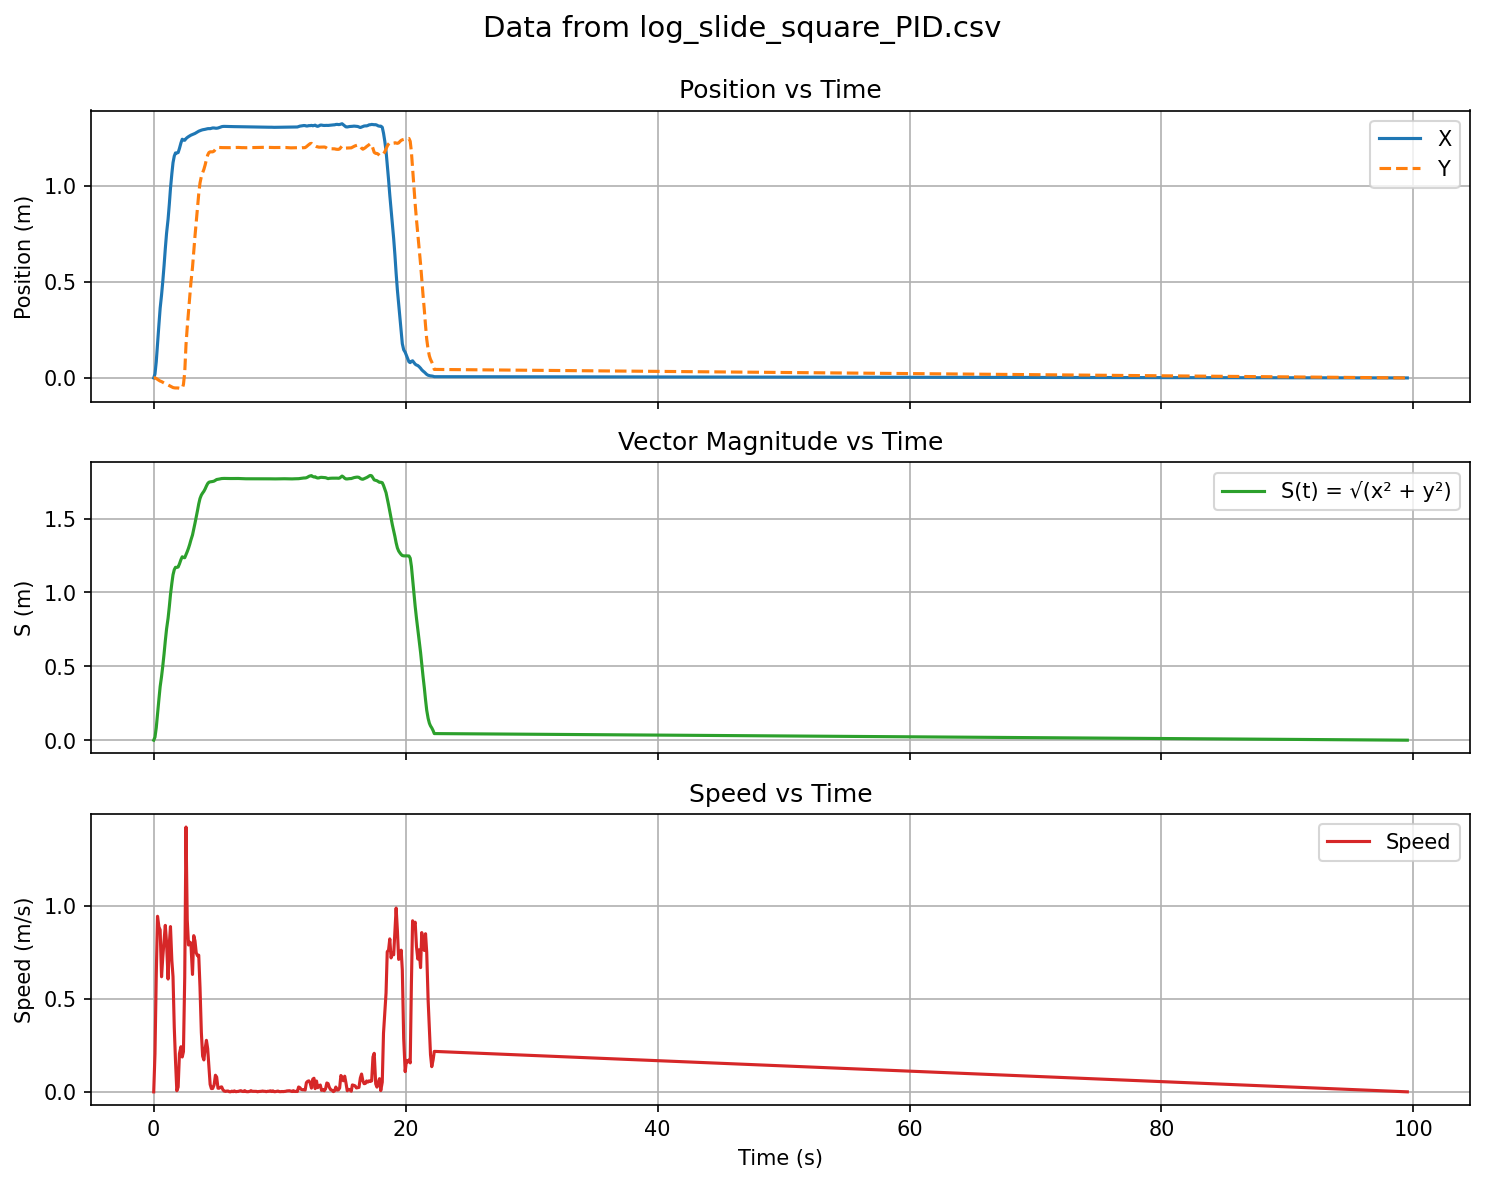

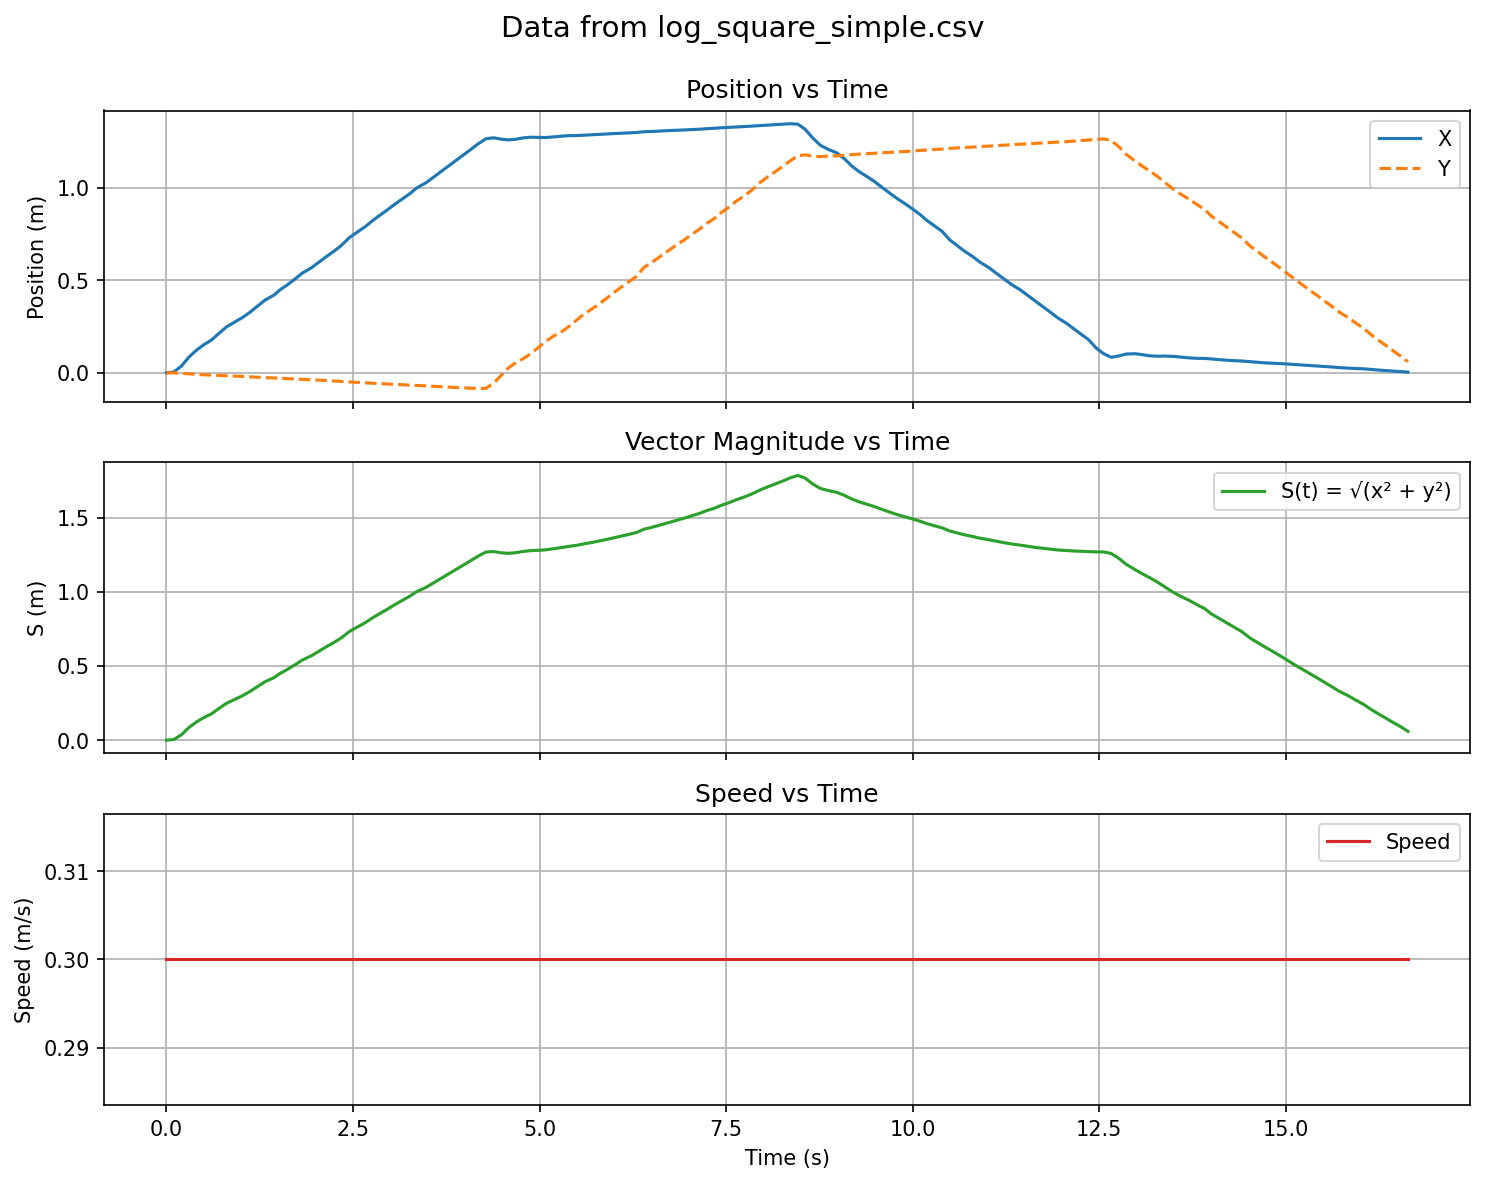

In [19]:
def convert_to_delta_time(df):
    df = df.copy()
    if 'timestamp' in df.columns:
        df['time'] = df['timestamp'] - df['timestamp'].iloc[0]
    else:
        df['time'] = 0
    return df

for file in csv_files:
    df = pd.read_csv(file)
    df = convert_to_delta_time(df)

    # สร้าง 3 กราฟ: X/Y, S, Speed
    fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
    fig.suptitle(f"Data from {file.name}", fontsize=14)

    # กราฟ 1: X และ Y
    if all(col in df.columns for col in ['x', 'y']):
        axs[0].plot(df['time'], df['x'], label='X')
        axs[0].plot(df['time'], df['y'], label='Y', linestyle='--')
        axs[0].set_ylabel("Position (m)")
        axs[0].legend()
        axs[0].grid(True)
        axs[0].set_title("Position vs Time")

        # กราฟ 2: ระยะเวกเตอร์ S
        df['s'] = (df['x']**2 + df['y']**2)**0.5
        axs[1].plot(df['time'], df['s'], label='S(t) = √(x² + y²)', color='tab:green')
        axs[1].set_ylabel("S (m)")
        axs[1].legend()
        axs[1].grid(True)
        axs[1].set_title("Vector Magnitude vs Time")

    # กราฟ 3: ความเร็ว
    if 'speed' in df.columns:
        axs[2].plot(df['time'], df['speed'], color='tab:red', label='Speed')
        axs[2].set_xlabel("Time (s)")
        axs[2].set_ylabel("Speed (m/s)")
        axs[2].legend()
        axs[2].grid(True)
        axs[2].set_title("Speed vs Time")

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

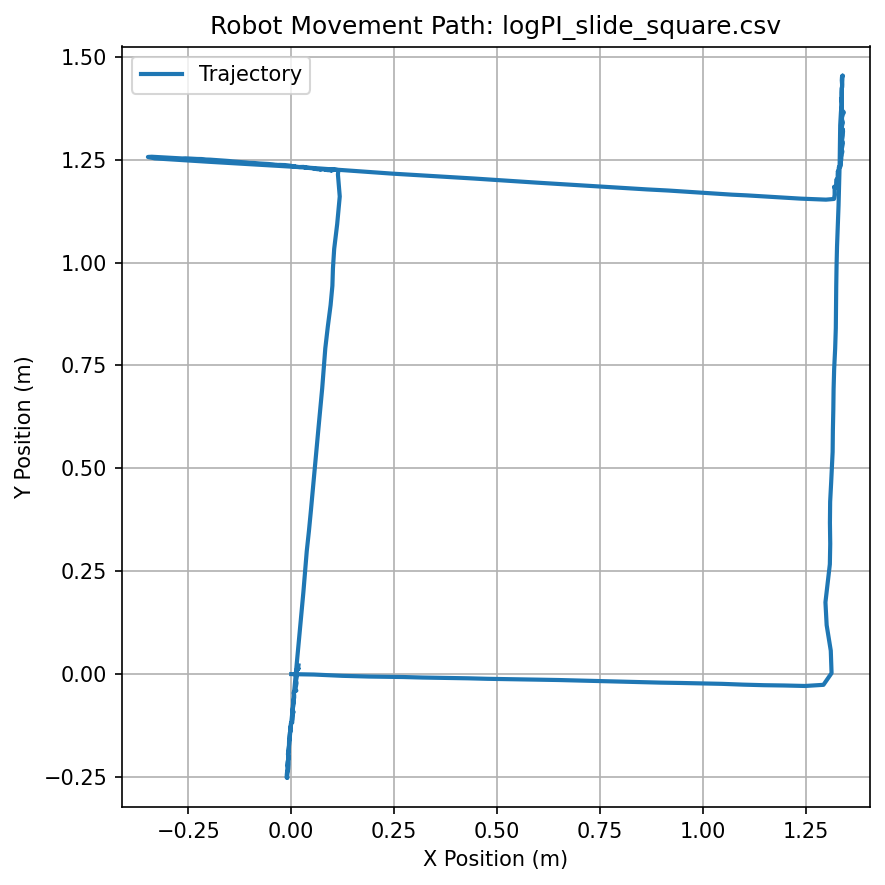

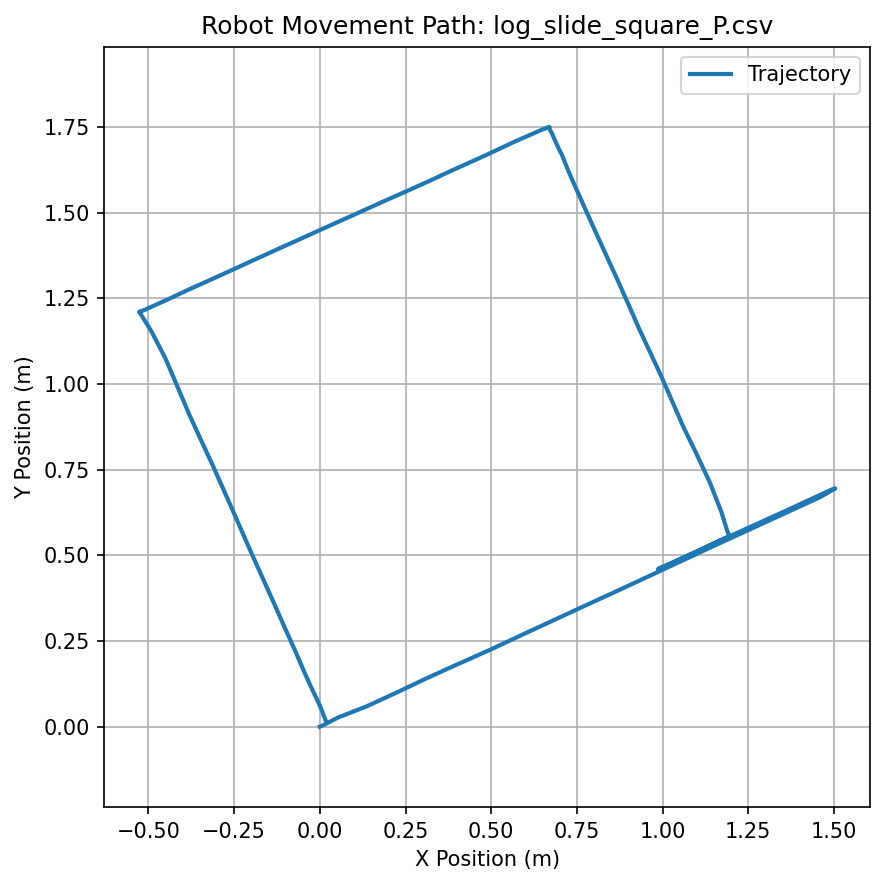

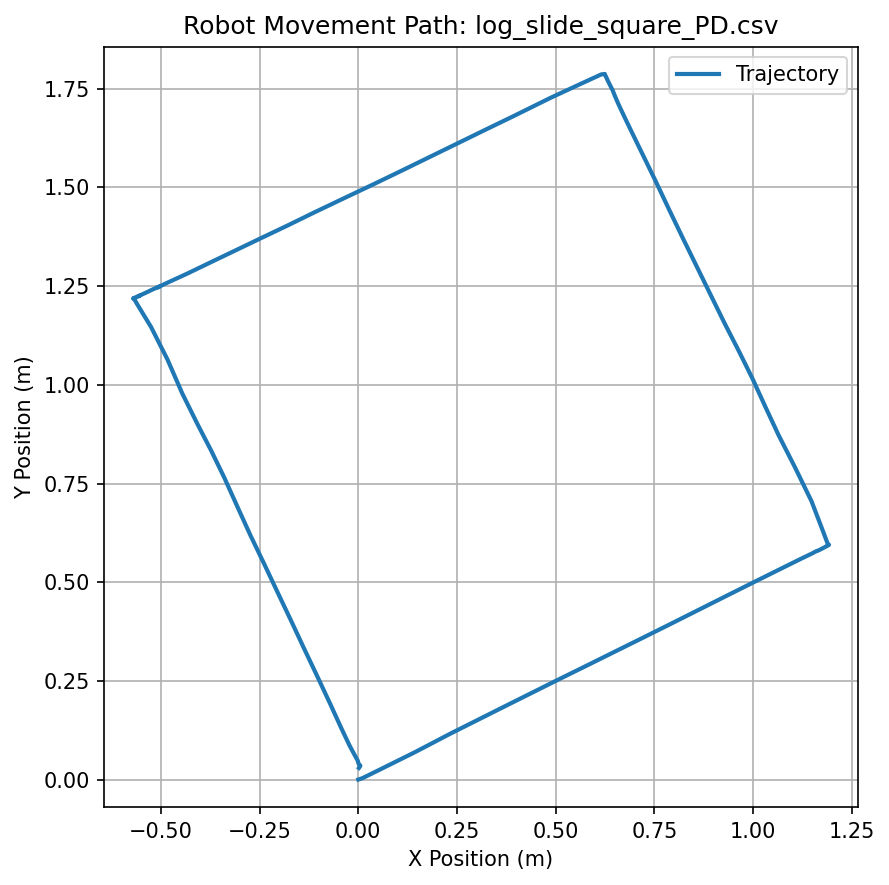

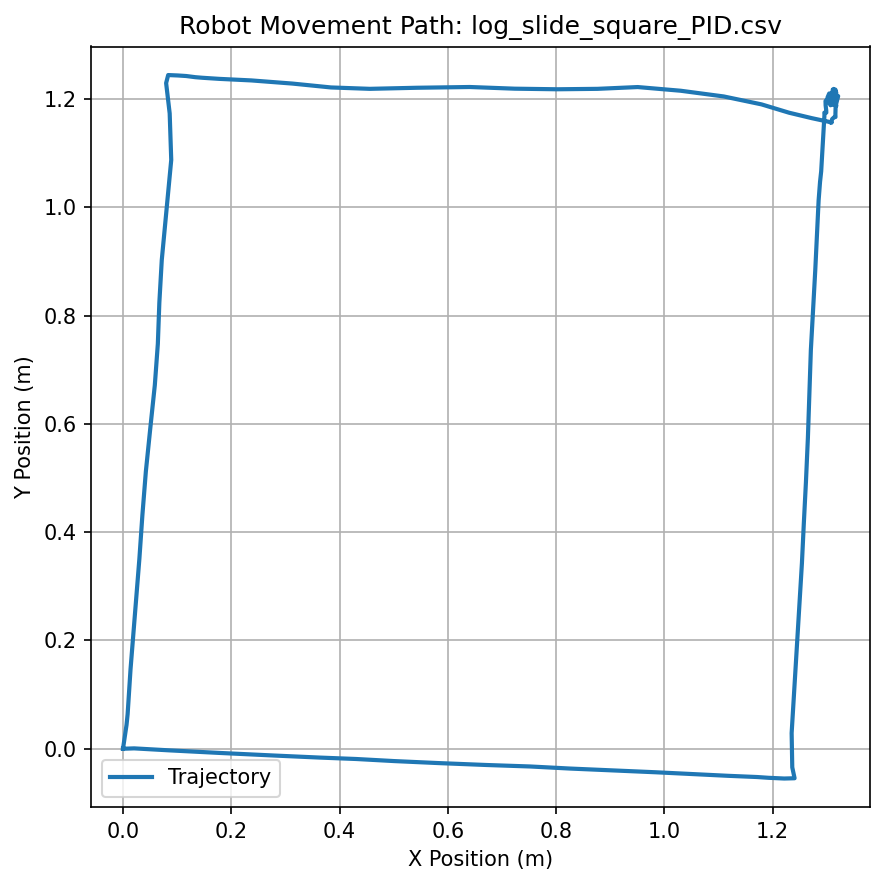

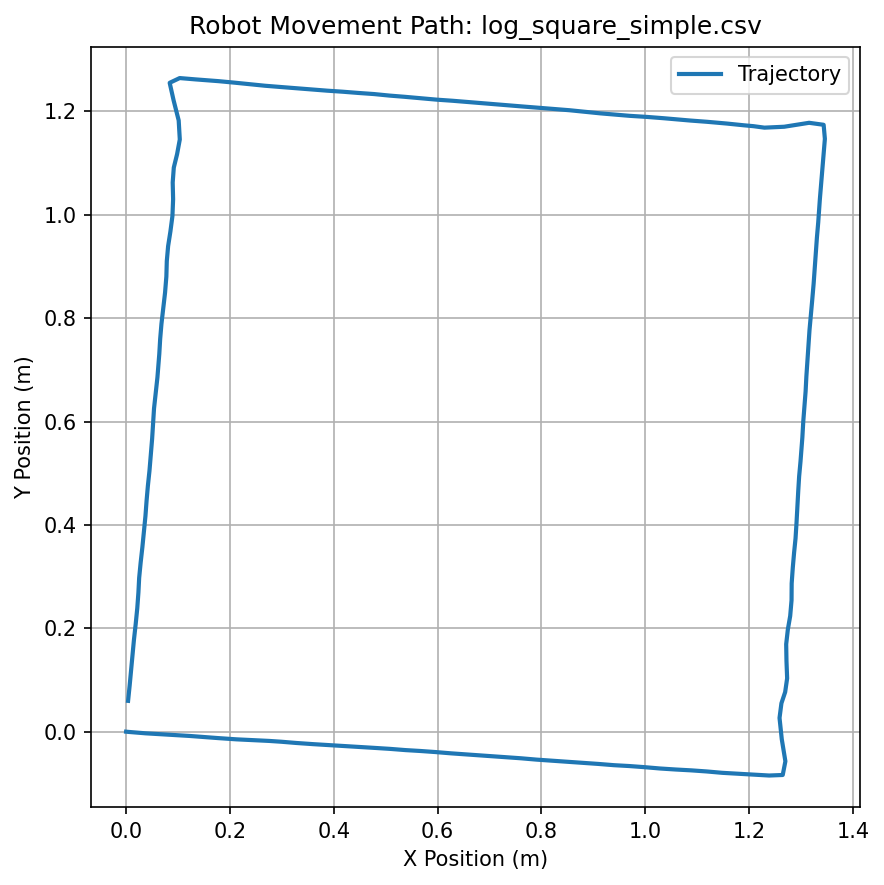

In [20]:
for file in csv_files:
    df = pd.read_csv(file)

    if all(col in df.columns for col in ['x', 'y']):
        plt.figure(figsize=(6, 6))
        plt.plot(df['x'], df['y'], marker='', linewidth=2, label="Trajectory")
        plt.title(f"Robot Movement Path: {file.name}")
        plt.xlabel("X Position (m)")
        plt.ylabel("Y Position (m)")
        plt.axis("equal")  # สัดส่วนแกน X/Y ให้เท่ากัน
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

In [21]:
df = pd.read_csv("gimbal_time_response.csv")

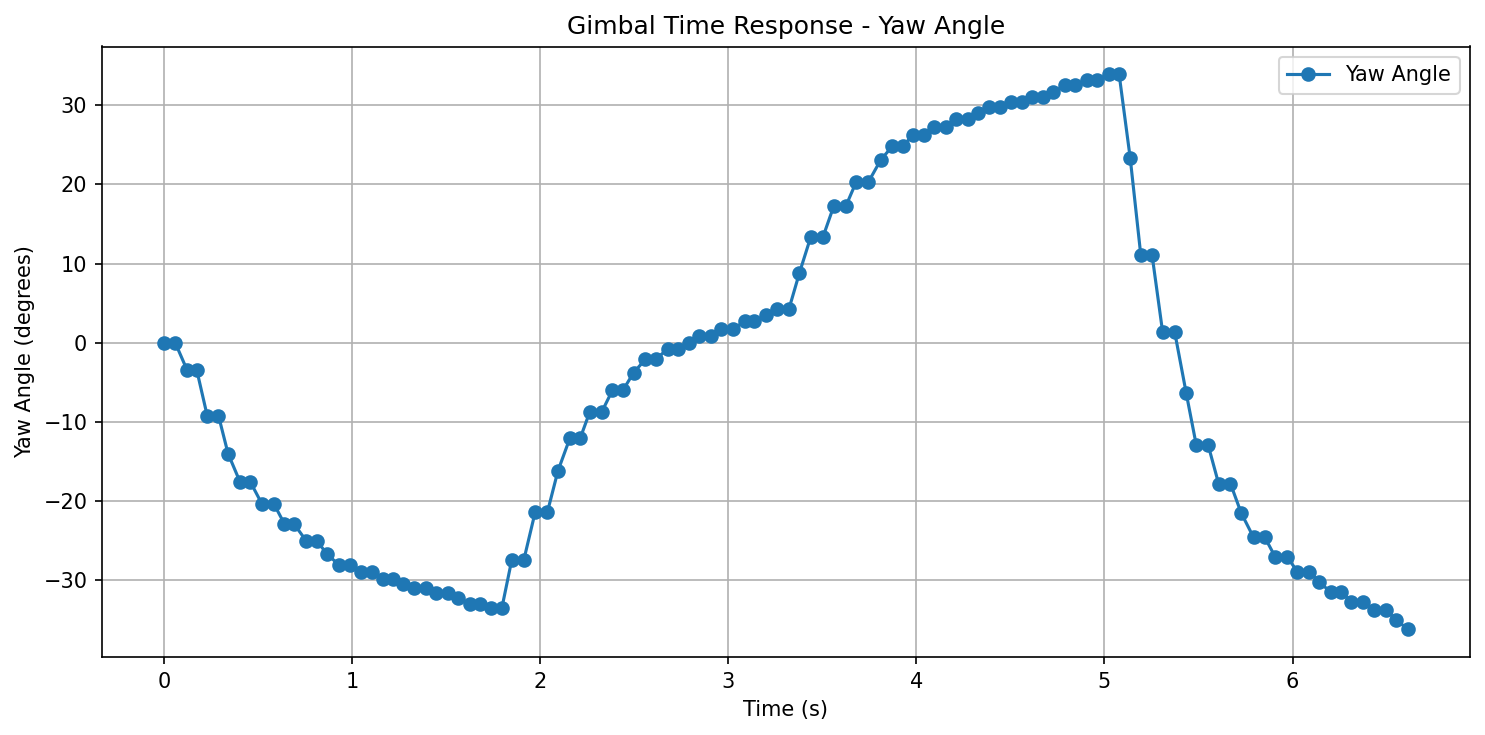

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(df['time'], df['yaw'], marker='o', linestyle='-', color='tab:blue', label='Yaw Angle')

plt.title("Gimbal Time Response - Yaw Angle")
plt.xlabel("Time (s)")
plt.ylabel("Yaw Angle (degrees)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()